<a href="https://colab.research.google.com/github/1849083010n-cell/chatbot/blob/main/Copy_%E8%A5%BF%E6%B8%B8%E8%AE%B0%EF%BC%8C%E6%9C%AC%E8%8D%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Colab!

## Explore the Gemini API
The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code and audio.

**How to get started**
*  Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google Account.
*  <a href="https://aistudio.google.com/app/apikey">Create an API key</a>.
* Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb">Python</a> or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.

**Discover Gemini's advanced capabilities**
*  Play with Gemini <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Image-out.ipynb">multimodal outputs</a>, mixing text and images in an iterative way.
*  Discover the <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_LiveAPI.ipynb">multimodal Live API</a> &#40;demo <a href="https://aistudio.google.com/live">here</a>&#41;.
*  Learn how to <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Spatial_understanding.ipynb&quot;">analyse images and detect items in your pictures</a> using Gemini &#40;bonus, there's a <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Spatial_understanding_3d.ipynb">3D version</a> as well!&#41;.
*  Unlock the power of the <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb">Gemini thinking model</a>, capable of solving complex tasks with its inner thoughts.
      
**Explore complex use cases**
*  Use <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Search_grounding_for_research_report.ipynb">Gemini grounding capabilities</a> to create a report on a company based on what the model can find on the Internet.
*  Extract <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Pdf_structured_outputs_on_invoices_and_forms.ipynb">invoices and form data from PDFs</a> in a structured way.
*  Create <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Book_illustration.ipynb">illustrations based on a whole book</a> using Gemini large context window and Imagen.

To learn more, take a look at the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.


In [ ]:
# 步骤1：挂载Google Drive（已挂载可跳过）
from google.colab import drive
drive.mount('/content/drive')

# 安装依赖
!pip install pyvis -q
!pip install jieba -q

# 步骤2：读取繁体《西游记》文本
import re

# 读取繁体文本并预处理
file_path = '/content/drive/MyDrive/Colab Notebooks/西遊記.txt'
try:
    # 尝试多种编码读取繁体文件
    encodings = ['utf-8', 'big5', 'utf-8-sig']
    text = None
    for encoding in encodings:
        try:
            with open(file_path, 'r', encoding=encoding) as f:
                text = f.read()
            break
        except UnicodeDecodeError:
            continue
    if text is None:
        raise Exception("无法解析文件编码（繁体文件建议用utf-8或big5）")

    # 文本清洗
    text = re.sub(r'[^\u4e00-\u9fa5，。！？、,.:;!?\n ]', '', text)
    text = re.sub(r'\n+', '\n', text).strip()
    print(f"繁体文本读取成功！长度：{len(text)}字符")
    print("文本预览（前200字）：", text[:200])
except Exception as e:
    print(f"文本处理失败：{e}")

# 步骤3：定义繁体角色及别名
character_aliases = {
    '孫悟空': ['孫悟空', '孫行者', '大聖', '齊天大聖', '美猴王', '悟空'],
    '唐僧': ['唐僧', '唐三藏', '玄奘', '師父'],
    '豬八戒': ['豬八戒', '八戒', '豬悟能', '呆子'],
    '沙和尚': ['沙和尚', '沙僧', '沙悟淨', '沙師弟'],
    '白龍馬': ['白龍馬', '白馬'],
    '玉皇大帝': ['玉皇大帝', '玉帝', '玉皇'],
    '如來佛祖': ['如來佛祖', '如來', '佛祖'],
    '觀音菩薩': ['觀音菩薩', '觀音', '觀世音'],
    '牛魔王': ['牛魔王', '牛魔'],
    '鐵扇公主': ['鐵扇公主', '鐵扇仙', '羅剎女'],
    '紅孩兒': ['紅孩兒', '聖嬰大王'],
    '太上老君': ['太上老君', '老君'],
    '白骨精': ['白骨精', '白骨夫人'],
    '二郎神': ['二郎神', '楊戩'],
    '哪吒': ['哪吒', '三壇海會大神'],
    '菩提祖師': ['菩提祖師', '菩提老祖'],
    '四海龍王': ['四海龍王', '東海龍王', '西海龍王', '南海龍王', '北海龍王'],
    '鎮元子': ['鎮元子', '鎮元大仙'],
    '女兒國國王': ['女兒國國王', '女王']
}

# 构建别名映射
alias_to_name = {}
for std_name, aliases in character_aliases.items():
    for alias in aliases:
        alias_to_name[alias] = std_name

all_aliases = [alias for aliases in character_aliases.values() for alias in aliases]

# 步骤4：提取关系
def extract_traditional_relations(text):
    relations = {}
    paragraphs = text.split('\n')

    for para in paragraphs:
        has_sun = any(alias in para for alias in character_aliases['孫悟空'])
        if not has_sun:
            continue

        for alias in all_aliases:
            if alias in character_aliases['孫悟空']:
                continue
            if alias in para:
                target_name = alias_to_name[alias]
                para_lower = para.lower()

                if target_name == '唐僧' and ('師父' in para or '三藏' in para):
                    rel_type = '師徒（孫悟空→唐僧）'
                elif target_name in ['豬八戒', '沙和尚'] and ('師弟' in para):
                    rel_type = '師兄弟'
                elif '打' in para or '殺' in para or '敵' in para or '妖' in para:
                    rel_type = '敵對'
                elif '幫' in para or '救' in para or '助' in para:
                    rel_type = '友好'
                elif '佛' in target_name or '菩薩' in target_name or '仙' in target_name:
                    rel_type = '神仙-弟子'
                else:
                    rel_type = '互動'

                if target_name in relations:
                    relations[target_name] = (relations[target_name][0], relations[target_name][1] + 1)
                else:
                    relations[target_name] = (rel_type, 1)

    relation_list = [('孫悟空', k, v[0], v[1]) for k, v in relations.items()]
    return sorted(relation_list, key=lambda x: x[3], reverse=True)

# 执行关系提取
if 'text' in locals():
    sun_relations = extract_traditional_relations(text)
    print("\n提取到的繁体角色关系（按互动次数排序）：")
    if sun_relations:
        for rel in sun_relations[:15]:
            print(f"{rel[0]} 與 {rel[1]}：{rel[2]}（{rel[3]}次）")
    else:
        print("未提取到关系，可能是繁体别名未覆盖文本中的表述")

# 步骤5：绘制关系网络图（修正字体设置错误）
from pyvis.network import Network
from IPython.display import HTML

# 修正后的网络图初始化代码（关键是加了 cdn_resources='in_line'）
def draw_traditional_network(relations):
    if not relations:
        return "無關係數據可繪製"

    # 这里添加 cdn_resources='in_line'，解决浏览器显示问题
    net = Network(
        height="700px", width="100%",
        bgcolor="#ffffff", font_color="#333333",
        notebook=True,
        cdn_resources='in_line'  # 新增这行，解决Chrome/Safari显示问题
    )

    # 后面的添加节点、边的代码不变...

    # 添加孫悟空节点（在font中设置字体）
    net.add_node(
        "孫悟空",
        size=60,
        color="#FFD700",
        title="主角：孫悟空（美猴王、齊天大聖）",
        font={"size": 20, "color": "#000000", "face": "Microsoft YaHei"}  # 这里设置字体
    )

    # 添加其他节点（同样在font中设置字体）
    for rel in relations:
        source, target, rel_type, count = rel
        node_size = min(20 + count // 3, 50)

        if "敵對" in rel_type:
            node_color = "#FF6347"
        elif "師徒" in rel_type or "師兄弟" in rel_type:
            node_color = "#32CD32"
        elif "神仙" in rel_type:
            node_color = "#1E90FF"
        else:
            node_color = "#9370DB"

        net.add_node(
            target,
            size=node_size,
            color=node_color,
            title=f"{target}\n互動次數：{count}",
            font={"size": 14, "face": "Microsoft YaHei"}  # 节点字体设置
        )

        net.add_edge(
            source, target,
            label=rel_type,
            width=min(count // 5, 10),
            color="#888888",
            title=f"互動次數：{count}",
            font={"face": "Microsoft YaHei"}  # 边的标签字体设置
        )

    # 布局设置
    net.set_options("""
    {
        "physics": {
            "barnesHut": {
                "gravitationalConstant": -2200,
                "springLength": 180
            },
            "stabilization": {
                "iterations": 250,
                "fit": true
            }
        },
        "edges": {
            "smooth": {
                "type": "cubicBezier",
                "forceDirection": "horizontal"
            }
        }
    }
    """)

    net.save_graph("sun_wukong_traditional_network.html")
    return HTML("sun_wukong_traditional_network.html")

# 绘制网络图
if 'sun_relations' in locals() and sun_relations:
    print("\n正在繪製繁体角色關係網絡圖...")
    display(draw_traditional_network(sun_relations))
else:
    print("\n無法繪製網絡圖（無關係數據）")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
繁体文本读取成功！长度：681611字符
文本预览（前200字）： 靈根育孕源流出心性修持大道生
詩曰
混沌未分天地亂，茫茫渺渺無人見。自從盤古破鴻濛，開闢從茲清濁辨。覆載群生仰至仁，發明萬物皆成善。欲知造化會元功，須看西遊釋厄傳。
蓋聞天地之數，有十二萬九千六百歲為一元。將一元分為十二會，乃子、丑、寅、卯、辰、巳、午、未、申、酉、戌、亥之十二支也。每會該一萬八百歲。且就一日而論子時得陽氣，而丑則雞鳴寅不通光，而卯則日出辰時食後，而巳則挨排日午天中，而未則西蹉申時

提取到的繁体角色关系（按互动次数排序）：
孫悟空 與 唐僧：師徒（孫悟空→唐僧）（726次）
孫悟空 與 豬八戒：互動（421次）
孫悟空 與 沙和尚：敵對（273次）
孫悟空 與 玉皇大帝：互動（91次）
孫悟空 與 觀音菩薩：敵對（89次）
孫悟空 與 如來佛祖：神仙-弟子（80次）
孫悟空 與 太上老君：互動（60次）
孫悟空 與 牛魔王：互動（52次）
孫悟空 與 哪吒：敵對（32次）
孫悟空 與 白龍馬：敵對（30次）
孫悟空 與 四海龍王：互動（23次）
孫悟空 與 鐵扇公主：敵對（21次）
孫悟空 與 紅孩兒：敵對（16次）
孫悟空 與 鎮元子：互動（7次）
孫悟空 與 女兒國國王：互動（5次）

正在繪製繁体角色關係網絡圖...


Mounted at /content/drive
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-wqy-microhei is already the newest version (0.2.0-beta-3.1).
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/wqy: caching, new cache contents: 2 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fon

警告：未找到章节标记，将全文视为一个章节
如来出现章节及情感分析：
   章节  出现次数  正面得分  负面得分  净情感值
0  全文     3    33    33     0


/tmp/ipython-input-3511891607.py:120: UserWarning: Glyph 31456 (\N{CJK UNIFIED IDEOGRAPH-7AE0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3511891607.py:120: UserWarning: Glyph 33410 (\N{CJK UNIFIED IDEOGRAPH-8282}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3511891607.py:120: UserWarning: Glyph 32034 (\N{CJK UNIFIED IDEOGRAPH-7D22}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3511891607.py:120: UserWarning: Glyph 24341 (\N{CJK UNIFIED IDEOGRAPH-5F15}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3511891607.py:120: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3511891607.py:120: UserWarning: Glyph 29616 (\N{CJK UNIFIED IDEOGRAPH-73B0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3511891607.py:120: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}

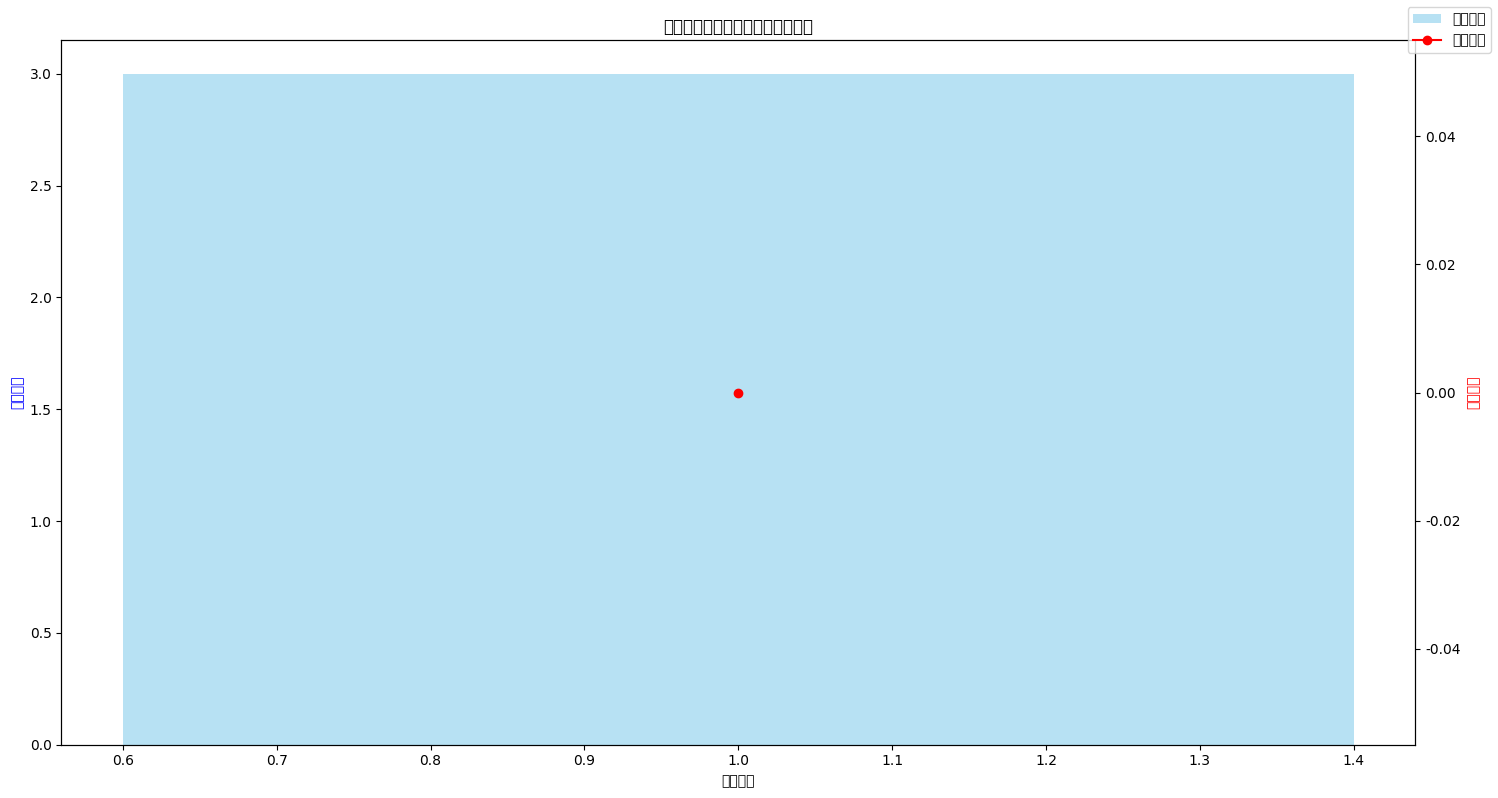

/tmp/ipython-input-3511891607.py:158: UserWarning: Glyph 20315 (\N{CJK UNIFIED IDEOGRAPH-4F5B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3511891607.py:158: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3511891607.py:158: UserWarning: Glyph 24904 (\N{CJK UNIFIED IDEOGRAPH-6148}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3511891607.py:158: UserWarning: Glyph 24754 (\N{CJK UNIFIED IDEOGRAPH-60B2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3511891607.py:158: UserWarning: Glyph 26234 (\N{CJK UNIFIED IDEOGRAPH-667A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3511891607.py:158: UserWarning: Glyph 24935 (\N{CJK UNIFIED IDEOGRAPH-6167}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3511891607.py:158: UserWarning: Glyph 21151 (\N{CJK UNIFIED IDEOGRAPH-529F}

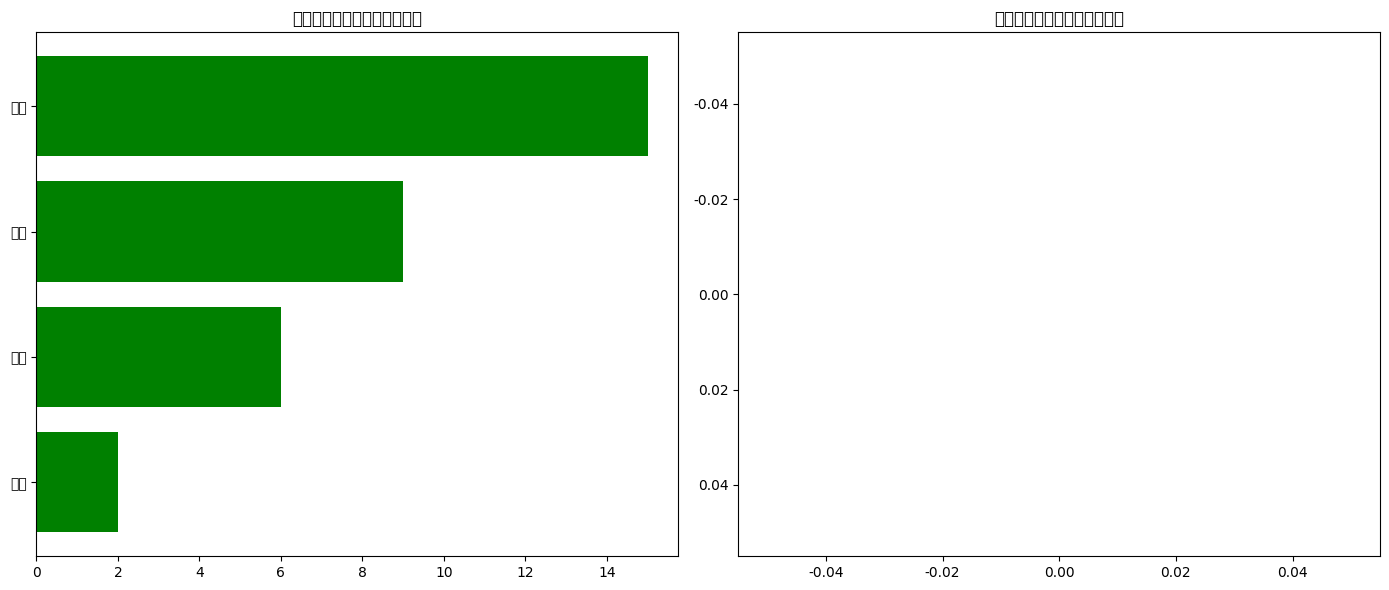

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22914 (\N{CJK UNIFIED IDEOGRAPH-5982}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26469 (\N{CJK UNIFIED IDEOGRAPH-6765}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20869 (\N{CJK UNIFIED IDEOGRAPH-5185}) missing from font(s) DejaVu Sans.
  fig.canvas


===== 情感属性总结 =====
整体正面情感得分：32
整体负面情感得分：0
正负面情感比率：32.00

主要正面词汇： ['佛法', '慈悲', '智慧', '功德']
主要负面词汇： []


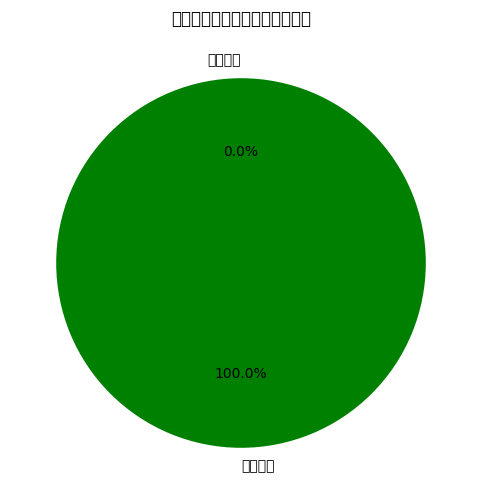

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 手动安装中文字体
!apt-get update -qq
!apt-get install -y fonts-wqy-microhei
!fc-cache -fv
import re
import jieba
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.font_manager as fm

# 配置中文字体
plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC", "Arial Unicode MS"]
plt.rcParams["axes.unicode_minus"] = False
try:
    font_path = [f for f in fm.findSystemFonts() if 'unicode' in f.lower() or 'heiti' in f.lower()][0]
    font_prop = fm.FontProperties(fname=font_path)
    plt.rcParams["font.family"] = font_prop.get_name()
except:
    plt.rcParams["font.family"] = "Arial Unicode MS"

def analyze_buddha_sentiment(file_path):
    """分析《西游记》中如来的出现情况及情感属性"""
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()

        # 章节分割
        chapter_pattern = re.compile(r'第[\u4e00-\u9fa5零一二三四五六七八九十百千\d]+回[：: ]?')
        chapter_matches = list(chapter_pattern.finditer(content))

        if not chapter_matches:
            print("警告：未找到章节标记，将全文视为一个章节")
            chapters = [content]
            chapter_titles = ["全文"]
        else:
            chapter_titles = [match.group().strip() for match in chapter_matches]
            chapters = []
            for i in range(len(chapter_matches)):
                start = chapter_matches[i].end()
                end = chapter_matches[i+1].start() if i < len(chapter_matches)-1 else len(content)
                chapters.append(content[start:end])

        # 情感分析词库（增加权重维度）
        sentiment_words = {
            'positive': {
                '善': 2, '慈悲': 3, '智慧': 3, '功德': 2, '救': 2,
                '助': 2, '圣': 3, '尊': 2, '贤': 2, '佛法': 3,
                '真经': 3, '觉悟': 2, '解脱': 2, '圆满': 3
            },
            'negative': {
                '怪': 2, '妖': 2, '魔': 3, '难': 2, '苦': 2,
                '斗': 2, '敌': 2, '恶': 3, '孽': 3, '罚': 2,
                '恼': 1, '骗': 2, '害': 2, '乱': 2
            }
        }

        # 统计各章节如来出现及情感倾向
        buddha_data = []
        for idx, (title, chapter) in enumerate(zip(chapter_titles, chapters)):
            # 如来出现次数统计
            count = len(re.findall(r'如來佛祖|如来佛祖|如来', chapter))

            # 提取如来上下文
            context_pattern = re.compile(r'(.{0,30}如來.{0,30}|.{0,30}如来.{0,30})')
            contexts = context_pattern.findall(chapter)
            context_text = ' '.join(contexts)

            # 情感得分计算
            words = jieba.cut(context_text)
            pos_score = 0
            neg_score = 0
            pos_words = []
            neg_words = []

            for word in words:
                if word in sentiment_words['positive']:
                    pos_score += sentiment_words['positive'][word]
                    pos_words.append(word)
                elif word in sentiment_words['negative']:
                    neg_score += sentiment_words['negative'][word]
                    neg_words.append(word)

            # 净情感值（正面减负面）
            net_sentiment = pos_score - neg_score

            buddha_data.append({
                '章节': title,
                '章节索引': idx + 1,
                '出现次数': count,
                '正面得分': pos_score,
                '负面得分': neg_score,
                '净情感值': net_sentiment,
                '正面词汇': Counter(pos_words).most_common(3),
                '负面词汇': Counter(neg_words).most_common(3)
            })

        # 创建数据框并展示
        df = pd.DataFrame(buddha_data)
        non_zero_df = df[df['出现次数'] > 0].sort_values(by='章节索引')
        print("如来出现章节及情感分析：")
        print(non_zero_df[['章节', '出现次数', '正面得分', '负面得分', '净情感值']])

        # 可视化1：出现次数与净情感值趋势
        if not non_zero_df.empty:
            fig, ax1 = plt.subplots(figsize=(15, 8))
            ax2 = ax1.twinx()

            ax1.bar(non_zero_df['章节索引'], non_zero_df['出现次数'], color='skyblue', alpha=0.6, label='出现次数')
            ax2.plot(non_zero_df['章节索引'], non_zero_df['净情感值'], color='red', marker='o', label='净情感值')

            ax1.set_xlabel('章节索引')
            ax1.set_ylabel('出现次数', color='blue')
            ax2.set_ylabel('净情感值', color='red')
            plt.title('如来出现次数与情感倾向变化趋势')
            fig.legend(loc='upper right')
            plt.tight_layout()
            plt.show()

        # 提取所有相关上下文进行整体情感分析
        pattern = re.compile(r'(.{0,50}如來.{0,50}|.{0,50}如来.{0,50})')
        all_contexts = pattern.findall(content)
        if not all_contexts:
            print("未找到包含'如来'的内容")
            return

        all_text = ' '.join(all_contexts)
        stopwords = {'的', '了', '在', '是', '他', '就', '有', '也', '和', '之', '为', '着', '于', '这', '那', '曰', '道', '说'}
        words = jieba.cut(all_text)
        filtered_words = [word for word in words if len(word) > 1 and word not in stopwords and word not in ['如來', '如来']]

        # 整体情感词汇统计
        total_pos = Counter()
        total_neg = Counter()
        for word in filtered_words:
            if word in sentiment_words['positive']:
                total_pos[word] += sentiment_words['positive'][word]
            elif word in sentiment_words['negative']:
                total_neg[word] += sentiment_words['negative'][word]

        # 可视化2：情感词汇分布
        plt.figure(figsize=(14, 6))
        plt.subplot(1, 2, 1)
        pos_df = pd.DataFrame(total_pos.most_common(10), columns=['词汇', '权重得分'])
        plt.barh(pos_df['词汇'], pos_df['权重得分'], color='green')
        plt.title('高频正面情感词汇（带权重）')
        plt.gca().invert_yaxis()

        plt.subplot(1, 2, 2)
        neg_df = pd.DataFrame(total_neg.most_common(10), columns=['词汇', '权重得分'])
        plt.barh(neg_df['词汇'], neg_df['权重得分'], color='red')
        plt.title('高频负面情感词汇（带权重）')
        plt.gca().invert_yaxis()

        plt.tight_layout()
        plt.show()

        # 情感总结
        total_pos_score = sum(total_pos.values())
        total_neg_score = sum(total_neg.values())
        sentiment_ratio = total_pos_score / (total_neg_score + 1)  # 避免除零

        print("\n===== 情感属性总结 =====")
        print(f"整体正面情感得分：{total_pos_score}")
        print(f"整体负面情感得分：{total_neg_score}")
        print(f"正负面情感比率：{sentiment_ratio:.2f}")
        print("\n主要正面词汇：", [w[0] for w in total_pos.most_common(5)])
        print("主要负面词汇：", [w[0] for w in total_neg.most_common(5)])

        # 可视化3：整体情感倾向
        plt.figure(figsize=(8, 6))
        plt.pie(
            [total_pos_score, total_neg_score],
            labels=['正面情感', '负面情感'],
            autopct='%1.1f%%',
            colors=['green', 'red'],
            startangle=90
        )
        plt.title('如来相关内容整体情感倾向分布')
        plt.show()

    except FileNotFoundError:
        print(f"错误：找不到文件 {file_path}")
    except Exception as e:
        print(f"发生错误：{str(e)}")

# 设置文件路径（请根据实际路径修改）
file_path = '/content/drive/MyDrive/Colab Notebooks/西遊記.txt'

# 执行分析
analyze_buddha_sentiment(file_path)

In [ ]:
import re

# 文件路径（Colab中已指定的位置）
file_path = "/content/drive/MyDrive/Colab Notebooks/本草纲目.txt"

# 目标关键字（金木水火土，单独匹配每个字）
target_chars = {'金', '木', '水', '火', '土'}

# 读取文件内容（使用gb2312编码，匹配《本草纲目》的保存格式）
try:
    with open(file_path, 'r', encoding='gb2312') as f:
        content = f.read()
except UnicodeDecodeError:
    # 若gb2312失败，尝试utf-8编码（兼容不同保存格式）
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
        content = f.read()

# 清理文本中的多余空白（可选，根据实际文本格式调整）
content = re.sub(r'\s+', '', content)  # 去除所有空格和换行，适合无标点的古籍
# 若文本有标点，可用：content = re.sub(r'[\n\s]+', ' ', content).strip()

# 提取上下文的函数
def extract_contexts(text, target_chars, window=25):
    contexts = []
    for i, char in enumerate(text):
        if char in target_chars:
            # 计算上下文范围（确保不超出文本边界）
            start = max(0, i - window)
            end = min(len(text), i + window + 1)  # +1包含目标字符本身
            context = text[start:end]
            # 标记目标字符（便于识别）
            marked_context = context.replace(char, f'【{char}】', 1)
            contexts.append({
                '位置': i,
                '目标字符': char,
                '上下文': marked_context,
                '上下文长度': len(marked_context)
            })
    return contexts

# 提取所有上下文
results = extract_contexts(content, target_chars, window=25)

# 输出结果（前10条示例，完整结果可保存为文件）
print(f"共找到 {len(results)} 处包含'金木水火土'的内容：\n")
for i, item in enumerate(results[:10], 1):  # 显示前10条，可改为results查看全部
    print(f"第{i}条：")
    print(f"目标字符：{item['目标字符']}")
    print(f"上下文：{item['上下文']}\n")

# 可选：将所有结果保存为TXT文件（保存到Colab目录，可手动下载）
output_path = "/content/本草纲目_五行上下文.txt"
with open(output_path, 'w', encoding='utf-8') as f:
    f.write(f"《本草纲目》中包含'金木水火土'的上下文（前后25字）共{len(results)}条：\n\n")
    for idx, item in enumerate(results, 1):
        f.write(f"第{idx}条：\n")
        f.write(f"目标字符：{item['目标字符']}\n")
        f.write(f"上下文：{item['上下文']}\n\n")

print(f"\n完整结果已保存至：{output_path}（可在左侧文件栏下载）")

共找到 20473 处包含'金木水火土'的内容：

第1条：
目标字符：土
上下文：纲，附释名为目，正始也；次以集解、辨疑、正误，详其【土】产形状也；次以气味、主治、附方，着其体用也。上自坟

第2条：
目标字符：金
上下文：用也。上自坟典，下及传奇，凡有相关，靡不备采。如入【金】谷之园，种色夺目；如登龙君之宫，宝藏悉陈；如对冰壶

第3条：
目标字符：木
上下文：生姜、薯蓣，菜也，而列草品；槟榔、龙眼，果也，而列【木】部。八谷，生民之天也，不能明辨其种类；三菘，日用之

第4条：
目标字符：水
上下文：罔克的别其名称。黑豆、赤菽，大小同条；硝石、芒硝，【水】火混注。以兰花为兰草，卷丹为百合，此寇氏《衍义》之

第5条：
目标字符：火
上下文：克的别其名称。黑豆、赤菽，大小同条；硝石、芒硝，水【火】混注。以兰花为兰草，卷丹为百合，此寇氏《衍义》之舛

第6条：
目标字符：木
上下文：蒌，两处图形，苏氏之欠明。五倍子，构虫窠也，而认为【木】实；大草，田字草也，而指为浮萍。似兹之类，不可枚陈

第7条：
目标字符：水
上下文：不揣猥愚，僭肆删述，重复者芟之，遗缺者补之。如磨刀【水】、潦水、桑柴火、艾火、锁阳、山柰、土茯苓、番木鳖、

第8条：
目标字符：水
上下文：愚，僭肆删述，重复者芟之，遗缺者补之。如磨刀【水】、潦水、桑柴火、艾火、锁阳、山柰、土茯苓、番木鳖、金柑、

第9条：
目标字符：火
上下文：删述，重复者芟之，遗缺者补之。如磨刀水、潦水、桑柴【火】、艾火、锁阳、山柰、土茯苓、番木鳖、金柑、樟脑、蝎

第10条：
目标字符：火
上下文：重复者芟之，遗缺者补之。如磨刀水、潦水、桑柴【火】、艾火、锁阳、山柰、土茯苓、番木鳖、金柑、樟脑、蝎虎、狗


完整结果已保存至：/content/本草纲目_五行上下文.txt（可在左侧文件栏下载）


In [ ]:
import re
from google.colab import drive

# 挂载Google Drive（若已挂载可跳过）
drive.mount('/content/drive')

# 文件路径（根据你的文件位置调整）
file_path = "/content/drive/MyDrive/Colab Notebooks/雷公炮制药性解.txt"

# 目标关键字：金木水火土
target_chars = {'金', '木', '水', '火', '土'}

# 读取文件内容（自动适配编码）
try:
    # 优先尝试gb2312（古籍常见编码）
    with open(file_path, 'r', encoding='gb2312') as f:
        content = f.read()
except (UnicodeDecodeError, LookupError):
    # 若失败，尝试utf-8编码
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
    except UnicodeDecodeError:
        # 极端情况：忽略无法解码的字符
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
            content = f.read()

# 清理文本（去除多余空白，保留基本结构）
content = re.sub(r'[\n\s]+', ' ', content).strip()  # 用空格替代换行和连续空格

# 提取上下文的函数
def extract_contexts(text, target_chars, window=25):
    contexts = []
    for idx, char in enumerate(text):
        if char in target_chars:
            # 计算上下文范围（避免超出文本边界）
            start = max(0, idx - window)
            end = min(len(text), idx + window + 1)  # +1包含目标字符本身
            context = text[start:end]
            # 标记目标字符
            marked_context = context.replace(char, f'【{char}】', 1)  # 只标记当前位置的字符
            contexts.append({
                '位置': idx,
                '目标字': char,
                '上下文': marked_context
            })
    return contexts

# 执行提取
results = extract_contexts(content, target_chars, window=50)

# 输出结果预览（前10条）
print(f"在《雷公炮制药性解》中找到 {len(results)} 处包含'金、木、水、火、土'的内容：\n")
for i, item in enumerate(results[:100], 1):
    print(f"第{i}条：")
    print(f"目标字：{item['目标字']}")
    print(f"上下文：{item['上下文']}\n")

# 保存完整结果到文件
output_path = "/content/雷公炮制药性解_五行上下文.txt"
with open(output_path, 'w', encoding='utf-8') as f:
    f.write(f"《雷公炮制药性解》中包含'金、木、水、火、土'的上下文（前后25字）共{len(results)}条：\n\n")
    for i, item in enumerate(results, 1):
        f.write(f"第{i}条：\n")
        f.write(f"目标字：{item['目标字']}\n")
        f.write(f"上下文：{item['上下文']}\n\n")

print(f"完整结果已保存至：{output_path}")
print("可在左侧文件浏览器中找到该文件，右键下载到本地查看")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
在《雷公炮制药性解》中找到 889 处包含'金、木、水、火、土'的内容：

第1条：
目标字：木
上下文：首书八卦，开万世道术之祖。而神农遍尝百味，黄帝着为《素问》，迹其鼎足，所化医之用居多。今考本经所载草【木】鸟兽等类，则干木果震萑苇坤子母牛兑羊良狗之说，酸咸有五味之别，青黄有五色之分。则坎水离火震木兑金坤土

第2条：
目标字：木
上下文：道术之祖。而神农遍尝百味，黄帝着为《素问》，迹其鼎足，所化医之用居多。今考本经所载草【木】鸟兽等类，则干木果震萑苇坤子母牛兑羊良狗之说，酸咸有五味之别，青黄有五色之分。则坎水离火震木兑金坤土之说，定浮沉，明

第3条：
目标字：水
上下文：。今考本经所载草木鸟兽等类，则干木果震萑苇坤子母牛兑羊良狗之说，酸咸有五味之别，青黄有五色之分。则坎【水】离火震木兑金坤土之说，定浮沉，明燥湿。则本天本地亲上亲下之说，立君臣，分佐使。则君一民二之说，有畏有

第4条：
目标字：火
上下文：考本经所载草木鸟兽等类，则干木果震萑苇坤子母牛兑羊良狗之说，酸咸有五味之别，青黄有五色之分。则坎水离【火】震木兑金坤土之说，定浮沉，明燥湿。则本天本地亲上亲下之说，立君臣，分佐使。则君一民二之说，有畏有喜，

第5条：
目标字：木
上下文：经所载草【木】鸟兽等类，则干木果震萑苇坤子母牛兑羊良狗之说，酸咸有五味之别，青黄有五色之分。则坎水离火震木兑金坤土之说，定浮沉，明燥湿。则本天本地亲上亲下之说，立君臣，分佐使。则君一民二之说，有畏有喜，有恶

第6条：
目标字：金
上下文：载草木鸟兽等类，则干木果震萑苇坤子母牛兑羊良狗之说，酸咸有五味之别，青黄有五色之分。则坎水离火震木兑【金】坤土之说，定浮沉，明燥湿。则本天本地亲上亲下之说，立君臣，分佐使。则君一民二之说，有畏有喜，有恶有反

第7条：
目标字：土
上下文：木鸟兽等类，则干木果震萑苇坤子母牛兑羊良狗之说，酸咸有五味之别，青黄有五色之分。则坎水离火震木兑金坤【土】之说，定浮沉，明燥湿。则本天本地亲上亲下之说，立君臣，分佐使。则君一民二之说，有畏有喜，有

In [ ]:
import re
from google.colab import drive

# 挂载Google Drive（若已挂载可跳过）
drive.mount('/content/drive')

# 文件路径
file_path = "/content/drive/MyDrive/Colab Notebooks/雷公炮制药性解.txt"

# 目标关键词：仅关注“肾”
target_word = '肾'

# 读取文件内容（适配古籍编码）
try:
    with open(file_path, 'r', encoding='gb2312') as f:
        content = f.read()
except (UnicodeDecodeError, LookupError):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
    except UnicodeDecodeError:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
            content = f.read()

# 清理文本（保留合理分隔，避免语义混乱）
content = re.sub(r'[\n\s]+', ' ', content).strip()

# 提取“肾”相关上下文的函数（前后30字）
def extract_kidney_contexts(text, target, window=50):
    contexts = []
    # 遍历文本，定位所有“肾”字的位置
    for idx, char in enumerate(text):
        if char == target:
            # 计算前后30字范围（防止超出文本边界）
            start = max(0, idx - window)
            end = min(len(text), idx + window + 1)  # +1包含“肾”字本身
            context = text[start:end]
            # 用特殊符号标记“肾”字，方便识别
            marked_context = context.replace(target, f'【{target}】', 1)
            contexts.append({
                '位置': idx,
                '上下文（前后30字）': marked_context
            })
    return contexts

# 执行提取
results = extract_kidney_contexts(content, target_word, window=50)

# 输出结果预览（前10条）
print(f"在《雷公炮制药性解》中找到 {len(results)} 处包含'肾'的内容：\n")
for i, item in enumerate(results[:50], 1):
    print(f"第{i}条：")
    print(f"{item['上下文（前后30字）']}\n")

# 保存完整结果到文件
output_path = "/content/雷公炮制药性解_肾相关内容.txt"
with open(output_path, 'w', encoding='utf-8') as f:
    f.write(f"《雷公炮制药性解》中包含'肾'的上下文（前后30字）共{len(results)}条：\n\n")
    for i, item in enumerate(results, 1):
        f.write(f"第{i}条：\n")
        f.write(f"{item['上下文（前后30字）']}\n\n")

print(f"完整结果已保存至：{output_path}")
print("可在左侧文件浏览器中下载查看")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
在《雷公炮制药性解》中找到 188 处包含'肾'的内容：

第1条：
用甘草二两，紫背天葵一镒，五方草自然汁一镒，同东流水煮过。 卷一 金石部 钟乳 味甘，性温有毒，入肺【肾】二经，主泄精寒嗽，壮元气，益阳事，安五脏，通百节，利九窍下乳汁，亦能通声，光润轻松，色如炼硝石者佳，

第2条：
上入肉不见为度，蛇床为使，恶牡丹玄石牡蒙。畏紫石英蓑草。忌羊血。 按：钟乳性温，而状有下行之义，宜入【肾】经，肺即其母也，故并入之。诸家本草述其功者甚众，惟丹溪以为剽悍之剂，不宜轻用。不炼而服，使人病淋。 

第3条：
成粉，以密绢罗过，生甘草水飞过，去水，令干，重研细，用之良。 卷一 金石部 青盐 味咸，性寒无毒，入【肾】经。主明目。止痛益气，坚筋骨，助水脏，除心腹痛。破聚癣疥疮。一名戎盐，一名胡盐。 按：青盐味咸，肾所

第4条：
入【肾】经。主明目。止痛益气，坚筋骨，助水脏，除心腹痛。破聚癣疥疮。一名戎盐，一名胡盐。 按：青盐味咸，肾所宜也，故独入之，水脏既补，则明目坚骨等功，何足异耶？ 卷一 金石部 食盐 味咸，性温无毒，入肾肺肝

第5条：
咸，【肾】所宜也，故独入之，水脏既补，则明目坚骨等功，何足异耶？ 卷一 金石部 食盐 味咸，性温无毒，入肾肺肝三经。主鬼蛊邪疰毒瓦斯，洗下部 疮，吐中焦痰癖，熨疝气及纳肾气，止霍乱及心腹卒痛，杀虫去风，明目

第6条：
一 金石部 食盐 味咸，性温无毒，入【肾】肺肝三经。主鬼蛊邪疰毒瓦斯，洗下部 疮，吐中焦痰癖，熨疝气及纳肾气，止霍乱及心腹卒痛，杀虫去风，明目固齿，白如霜雪者佳。炒研用。 按：食盐之咸，本归肾腑，肺即其母，

第7条：
癖，熨疝气及纳【肾】气，止霍乱及心腹卒痛，杀虫去风，明目固齿，白如霜雪者佳。炒研用。 按：食盐之咸，本归肾腑，肺即其母，肝即其子也，故并入之。本草云：食伤筋损肺水，肿及咳嗽血虚者忌之何也？盖以咸走肾，过多则

第8条：
咸，本归【肾】腑，肺即其母，肝即其子也，故并入之。本草云：食伤筋损肺水，肿及咳嗽血虚者忌之何也？盖以咸走肾，过多则肾不能胜而受伤。于

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mounted at /content/drive
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-wqy-microhei is already the newest version (0.2.0-beta-3.1).
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/wqy: caching, new cache contents: 2 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fon

/tmp/ipython-input-3038723748.py:120: UserWarning: Glyph 31456 (\N{CJK UNIFIED IDEOGRAPH-7AE0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3038723748.py:120: UserWarning: Glyph 33410 (\N{CJK UNIFIED IDEOGRAPH-8282}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3038723748.py:120: UserWarning: Glyph 32034 (\N{CJK UNIFIED IDEOGRAPH-7D22}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3038723748.py:120: UserWarning: Glyph 24341 (\N{CJK UNIFIED IDEOGRAPH-5F15}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3038723748.py:120: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3038723748.py:120: UserWarning: Glyph 29616 (\N{CJK UNIFIED IDEOGRAPH-73B0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3038723748.py:120: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}

玉帝出现章节及情感分析：
   章节  出现次数  正面得分  负面得分  净情感值
0  全文   230    12     4     8


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31456 (\N{CJK UNIFIED IDEOGRAPH-7AE0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33410 (\N{CJK UNIFIED IDEOGRAPH-8282}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32034 (\N{CJK UNIFIED IDEOGRAPH-7D22}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24341 (\N{CJK UNIFIED IDEOGRAPH-5F15}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  fig.canvas

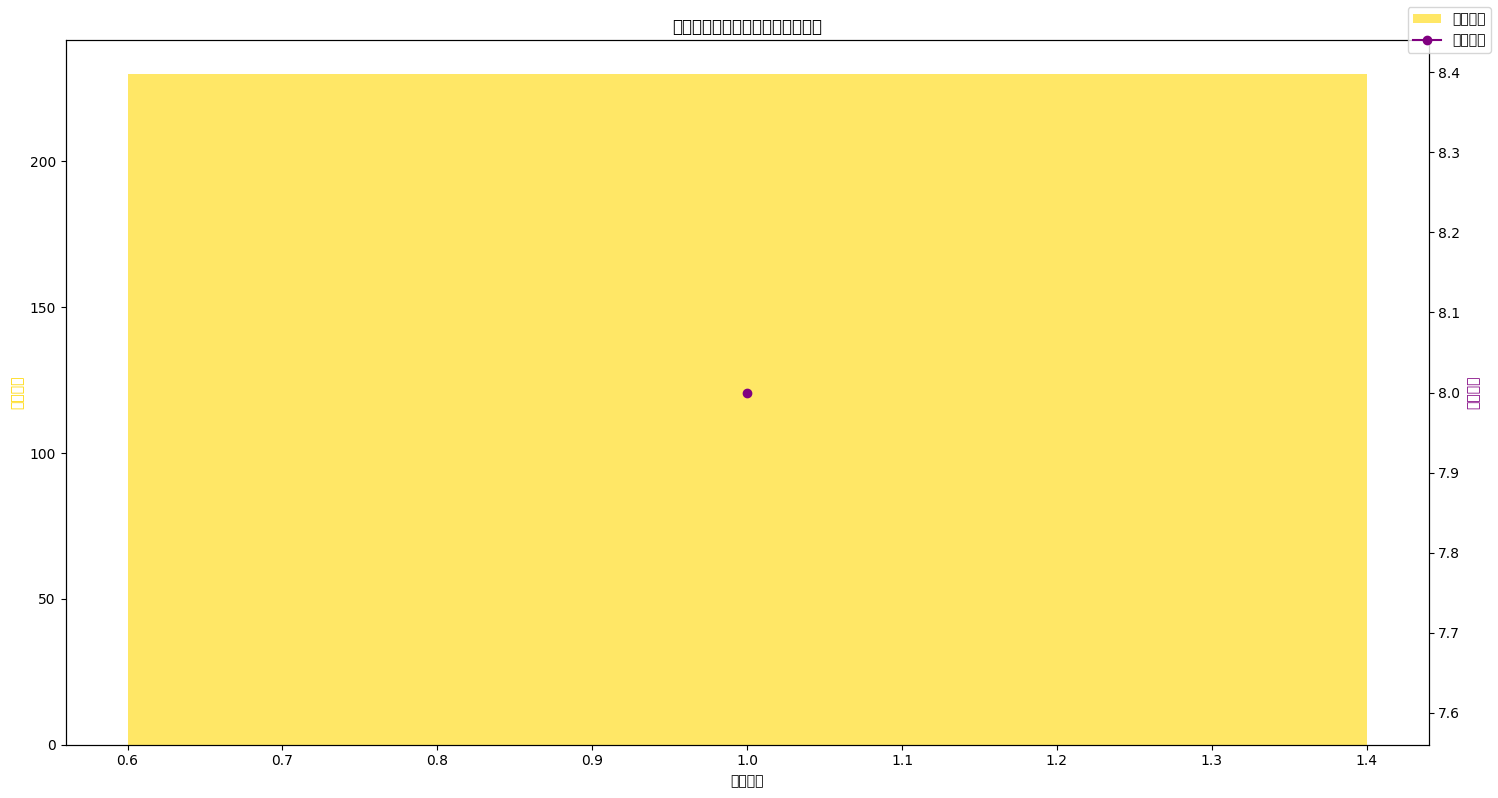

/tmp/ipython-input-3038723748.py:158: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3038723748.py:158: UserWarning: Glyph 24681 (\N{CJK UNIFIED IDEOGRAPH-6069}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3038723748.py:158: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3038723748.py:158: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3038723748.py:158: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3038723748.py:158: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3038723748.py:158: UserWarning: Glyph 24773 (\N{CJK UNIFIED IDEOGRAPH-60C5}

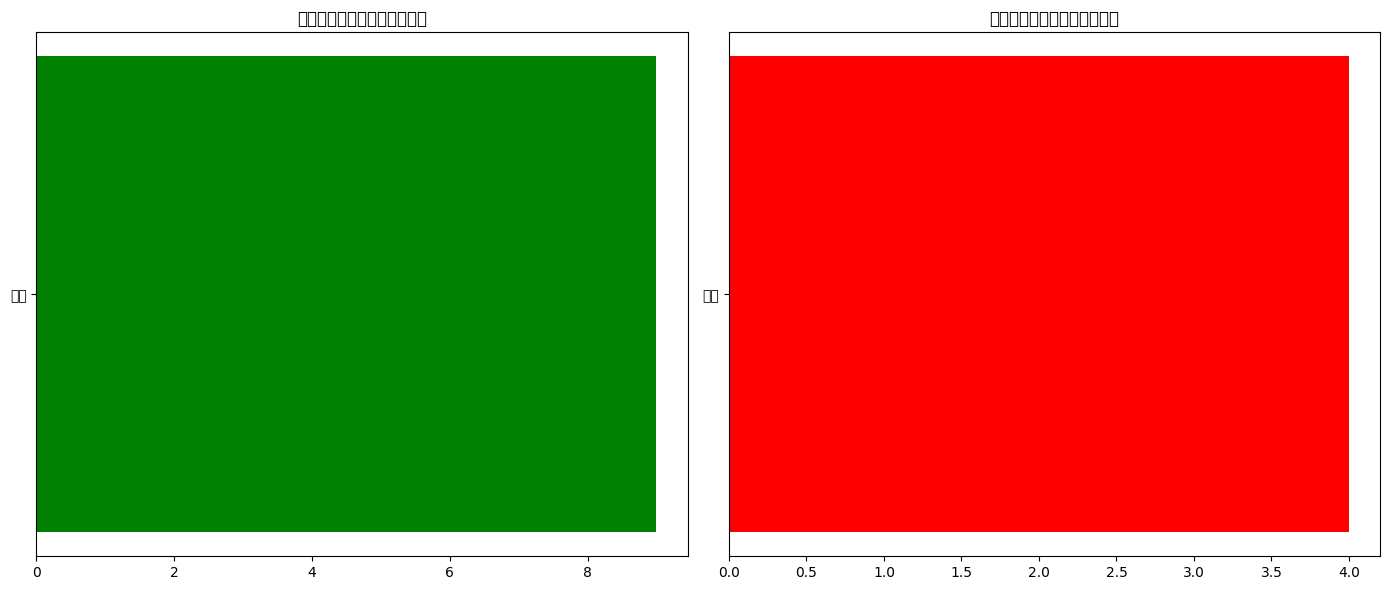

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20869 (\N{CJK UNIFIED IDEOGRAPH-5185}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23481 (\N{CJK UNIFIED IDEOGRAPH-5BB9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25972 (\N{CJK UNIFIED IDEOGRAPH-6574}) missing from font(s) DejaVu Sans.
  fig.canvas


===== 情感属性总结 =====
整体正面情感得分：9
整体负面情感得分：4
正负面情感比率：1.80

主要正面词汇： ['天恩']
主要负面词汇： ['失色']


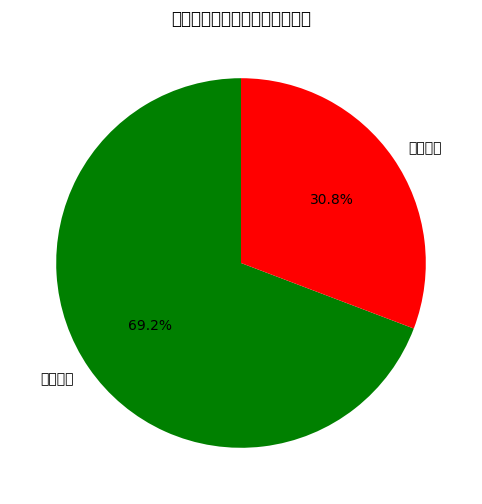

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 手动安装中文字体
!apt-get update -qq
!apt-get install -y fonts-wqy-microhei
!fc-cache -fv
import re
import jieba
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.font_manager as fm

# 配置中文字体
plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC", "Arial Unicode MS"]
plt.rcParams["axes.unicode_minus"] = False
try:
    font_path = [f for f in fm.findSystemFonts() if 'unicode' in f.lower() or 'heiti' in f.lower()][0]
    font_prop = fm.FontProperties(fname=font_path)
    plt.rcParams["font.family"] = font_prop.get_name()
except:
    plt.rcParams["font.family"] = "Arial Unicode MS"

def analyze_yuandi_sentiment(file_path):
    """分析《西游记》中玉帝的出现情况及情感属性"""
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()

        # 章节分割
        chapter_pattern = re.compile(r'第[\u4e00-\u9fa5零一二三四五六七八九十百千\d]+回[：: ]?')
        chapter_matches = list(chapter_pattern.finditer(content))

        if not chapter_matches:
            print("警告：未找到章节标记，将全文视为一个章节")
            chapters = [content]
            chapter_titles = ["全文"]
        else:
            chapter_titles = [match.group().strip() for match in chapter_matches]
            chapters = []
            for i in range(len(chapter_matches)):
                start = chapter_matches[i].end()
                end = chapter_matches[i+1].start() if i < len(chapter_matches)-1 else len(content)
                chapters.append(content[start:end])

        # 情感分析词库（适配玉帝角色的词汇体系）
        sentiment_words = {
            'positive': {
                '仁': 3, '圣明': 3, '威严': 2, '公正': 3, '恩德': 2,
                '仁慈': 3, '英明': 3, '功德': 2, '敕令': 2, '天恩': 3,
                '神圣': 2, '尊贵': 3, '威严': 2, '公正': 3
            },
            'negative': {
                '怒': 2, '惊': 2, '慌': 2, '无奈': 3, '难': 2,
                '急': 2, '怕': 3, '愁': 2, '乱': 2, '束手无策': 3,
                '狼狈': 3, '失色': 2, '无能': 3, '窘': 2
            }
        }

        # 统计各章节玉帝出现及情感倾向
        yuandi_data = []
        for idx, (title, chapter) in enumerate(zip(chapter_titles, chapters)):
            # 玉帝相关称呼匹配（包含玉皇大帝、大帝等）
            count = len(re.findall(r'玉帝|玉皇大帝|大帝|玉皇|玉皇帝', chapter))

            # 提取玉帝上下文
            context_pattern = re.compile(r'(.{0,30}玉帝.{0,30}|.{0,30}玉皇大帝.{0,30}|.{0,30}大帝.{0,30}|.{0,30}玉皇.{0,30})')
            contexts = context_pattern.findall(chapter)
            context_text = ' '.join(contexts)

            # 情感得分计算
            words = jieba.cut(context_text)
            pos_score = 0
            neg_score = 0
            pos_words = []
            neg_words = []

            for word in words:
                if word in sentiment_words['positive']:
                    pos_score += sentiment_words['positive'][word]
                    pos_words.append(word)
                elif word in sentiment_words['negative']:
                    neg_score += sentiment_words['negative'][word]
                    neg_words.append(word)

            # 净情感值（正面减负面）
            net_sentiment = pos_score - neg_score

            yuandi_data.append({
                '章节': title,
                '章节索引': idx + 1,
                '出现次数': count,
                '正面得分': pos_score,
                '负面得分': neg_score,
                '净情感值': net_sentiment,
                '正面词汇': Counter(pos_words).most_common(3),
                '负面词汇': Counter(neg_words).most_common(3)
            })

        # 创建数据框并展示
        df = pd.DataFrame(yuandi_data)
        non_zero_df = df[df['出现次数'] > 0].sort_values(by='章节索引')
        print("玉帝出现章节及情感分析：")
        print(non_zero_df[['章节', '出现次数', '正面得分', '负面得分', '净情感值']])

        # 可视化1：出现次数与净情感值趋势
        if not non_zero_df.empty:
            fig, ax1 = plt.subplots(figsize=(15, 8))
            ax2 = ax1.twinx()

            ax1.bar(non_zero_df['章节索引'], non_zero_df['出现次数'], color='gold', alpha=0.6, label='出现次数')
            ax2.plot(non_zero_df['章节索引'], non_zero_df['净情感值'], color='purple', marker='o', label='净情感值')

            ax1.set_xlabel('章节索引')
            ax1.set_ylabel('出现次数', color='gold')
            ax2.set_ylabel('净情感值', color='purple')
            plt.title('玉帝出现次数与情感倾向变化趋势')
            fig.legend(loc='upper right')
            plt.tight_layout()
            plt.show()

        # 提取所有相关上下文进行整体情感分析
        pattern = re.compile(r'(.{0,50}玉帝.{0,50}|.{0,50}玉皇大帝.{0,50}|.{0,50}大帝.{0,50}|.{0,50}玉皇.{0,50})')
        all_contexts = pattern.findall(content)
        if not all_contexts:
            print("未找到包含'玉帝'的内容")
            return

        all_text = ' '.join(all_contexts)
        stopwords = {'的', '了', '在', '是', '他', '就', '有', '也', '和', '之', '为', '着', '于', '这', '那', '曰', '道', '说', '天', '宫'}
        words = jieba.cut(all_text)
        filtered_words = [word for word in words if len(word) > 1 and word not in stopwords and word not in ['玉帝', '玉皇大帝', '大帝', '玉皇']]

        # 整体情感词汇统计
        total_pos = Counter()
        total_neg = Counter()
        for word in filtered_words:
            if word in sentiment_words['positive']:
                total_pos[word] += sentiment_words['positive'][word]
            elif word in sentiment_words['negative']:
                total_neg[word] += sentiment_words['negative'][word]

        # 可视化2：情感词汇分布
        plt.figure(figsize=(14, 6))
        plt.subplot(1, 2, 1)
        pos_df = pd.DataFrame(total_pos.most_common(10), columns=['词汇', '权重得分'])
        plt.barh(pos_df['词汇'], pos_df['权重得分'], color='green')
        plt.title('高频正面情感词汇（带权重）')
        plt.gca().invert_yaxis()

        plt.subplot(1, 2, 2)
        neg_df = pd.DataFrame(total_neg.most_common(10), columns=['词汇', '权重得分'])
        plt.barh(neg_df['词汇'], neg_df['权重得分'], color='red')
        plt.title('高频负面情感词汇（带权重）')
        plt.gca().invert_yaxis()

        plt.tight_layout()
        plt.show()

        # 情感总结
        total_pos_score = sum(total_pos.values())
        total_neg_score = sum(total_neg.values())
        sentiment_ratio = total_pos_score / (total_neg_score + 1)  # 避免除零

        print("\n===== 情感属性总结 =====")
        print(f"整体正面情感得分：{total_pos_score}")
        print(f"整体负面情感得分：{total_neg_score}")
        print(f"正负面情感比率：{sentiment_ratio:.2f}")
        print("\n主要正面词汇：", [w[0] for w in total_pos.most_common(5)])
        print("主要负面词汇：", [w[0] for w in total_neg.most_common(5)])

        # 可视化3：整体情感倾向
        plt.figure(figsize=(8, 6))
        plt.pie(
            [total_pos_score, total_neg_score],
            labels=['正面情感', '负面情感'],
            autopct='%1.1f%%',
            colors=['green', 'red'],
            startangle=90
        )
        plt.title('玉帝相关内容整体情感倾向分布')
        plt.show()

    except FileNotFoundError:
        print(f"错误：找不到文件 {file_path}")
    except Exception as e:
        print(f"发生错误：{str(e)}")

# 设置文件路径（请根据实际路径修改）
file_path = '/content/drive/MyDrive/Colab Notebooks/西遊記.txt'

# 执行分析
analyze_yuandi_sentiment(file_path)

In [ ]:
# 连接Google云端硬盘
from google.colab import drive
drive.mount('/content/drive')

# 导入必要的库
import re

def search_chaos(file_path):
    """
    在指定文件中检索"如来"二字，并显示其出现位置和上下文

    参数:
        file_path: 文件在Google云端硬盘中的路径
    """
    try:
        # 读取文件内容
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()

        # 使用正则表达式查找所有"如来"的位置
        pattern = re.compile(r'如來')
        matches = pattern.finditer(content)

        # 统计出现次数
        count = 0

        print("文件中'如來'二字的出现情况：\n")
        for match in matches:
            count += 1
            # 获取匹配位置
            start = match.start()
            end = match.end()

            # 获取上下文（前后各30个字符，避免索引越界）
            context_start = max(0, start - 30)
            context_end = min(len(content), end + 30)
            context = content[context_start:context_end]

            # 格式化输出
            print(f"出现次数: {count}")
            print(f"位置: 第 {start} 至 {end} 个字符")
            print(f"上下文: ...{context}...")
            print("-" * 80)

        print(f"\n总结：'如來'二字共出现 {count} 次")

    except FileNotFoundError:
        print(f"错误：找不到文件 {file_path}")
    except Exception as e:
        print(f"发生错误：{str(e)}")

# 请修改为你的文件在Google云端硬盘中的实际路径
# 例如：如果文件放在云端硬盘根目录，路径为 '/content/drive/MyDrive/靈根育孕源流出　心性修持大道生.txt'
file_path = '/content/drive/MyDrive/Colab Notebooks/西遊記.txt'

# 执行检索
search_chaos(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
文件中'如來'二字的出现情况：

出现次数: 1
位置: 第 42131 至 42133 个字符
上下文: ...弼馬豈知音。馬猿合作心和意，緊縛牢拴莫外尋。萬相歸真從一理，如來同契住雙林。

這一番，那猴王不分上下，使鐵棒東打西敵，更無...
--------------------------------------------------------------------------------
出现次数: 2
位置: 第 42788 至 42790 个字符
上下文: ...之前，對四金剛、八菩薩禮畢，即煩轉達。眾神隨至寶蓮臺下啟知，如來召請。二聖禮佛三匝，侍立臺下。如來問：「玉帝何事，煩二聖下臨...
--------------------------------------------------------------------------------
出现次数: 3
位置: 第 42805 至 42807 个字符
上下文: ...達。眾神隨至寶蓮臺下啟知，如來召請。二聖禮佛三匝，侍立臺下。如來問：「玉帝何事，煩二聖下臨？」二聖即啟道：「向時花果山產一猴...
--------------------------------------------------------------------------------
出现次数: 4
位置: 第 43129 至 43131 个字符
上下文: ...三十六員雷將把他困在垓心，終不能相近。事在緊急，因此玉帝特請如來救駕。」如來聞說，即對眾菩薩道：「汝等在此穩坐法堂，休得亂了...
--------------------------------------------------------------------------------
出现次数: 5
位置: 第 43135 至 43137 个字符
上下文: ...把他困在垓心，終不能相近。事在緊急，因此玉帝特請如來救駕。」如來聞說，即對眾菩薩道：「汝等在此穩坐法堂，休得亂了禪位，待我煉...


/tmp/ipython-input-3681300404.py:68: UserWarning: Glyph 22914 (\N{CJK UNIFIED IDEOGRAPH-5982}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3681300404.py:68: UserWarning: Glyph 20358 (\N{CJK UNIFIED IDEOGRAPH-4F86}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3681300404.py:68: UserWarning: Glyph 20315 (\N{CJK UNIFIED IDEOGRAPH-4F5B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3681300404.py:68: UserWarning: Glyph 31062 (\N{CJK UNIFIED IDEOGRAPH-7956}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3681300404.py:68: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3681300404.py:68: UserWarning: Glyph 29616 (\N{CJK UNIFIED IDEOGRAPH-73B0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3681300404.py:68: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missi

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
关键词出现次数统计：
'如來' 共出现 213 次
前3次出现的上下文示例：
  第1次：...縛牢拴莫外尋。萬相歸真從一理，如來同契住雙林。

這一番，那猴王...
  第2次：...煩轉達。眾神隨至寶蓮臺下啟知，如來召請。二聖禮佛三匝，侍立臺下。...
  第3次：...召請。二聖禮佛三匝，侍立臺下。如來問：「玉帝何事，煩二聖下臨？」...
  第4次：...能相近。事在緊急，因此玉帝特請如來救駕。」如來聞說，即對眾菩薩道...
  第5次：...緊急，因此玉帝特請如來救駕。」如來聞說，即對眾菩薩道：「汝等在此...
  第6次：...禪位，待我煉魔救駕去來。」

如來即喚阿儺、迦葉二尊者相隨，離了...
  第7次：...那方善士，敢來止住刀兵問我？」如來笑道：「我是西方極樂世界釋迦牟...
  第8次：...吵。」那大聖聞言，暗笑道：「這如來十分好獃。我老孫一觔斗去十萬八...
  第9次：...：「此間乃盡頭路了。這番回去，如來作證，靈霄宮定是我坐也。」又思...
  第10次：...「且住，等我留下些記號，方好與如來說話。」拔下一根毫毛，吹口仙氣...
------------------------------------------------------------
'佛祖' 共出现 91 次
前3次出现的上下文示例：
  第1次：...，乃三十六員雷將圍困著大聖哩。佛祖傳法旨：「教雷將停息干戈，放開...
  第2次：...該讓我，英雄只此敢爭先。」

佛祖聽言，呵呵冷笑道：「你那廝乃是...
  第3次：...還不讓，定要攪攘，永不清平。」佛祖道：「你除了長生變化之法，再有...
  第4次：...十萬八千里。如何坐不得天位？」佛祖道：「我與你打個賭賽：你若有本...
  第5次：...：「既如此說，你可做得主張？」佛祖道：「做得，做得。」伸開右手，...
  第6次：...意棒，抖擻神威，將身一縱，站在佛祖手心裡，卻道聲：「我出去也。」...
  第7次：...你看他一路雲光，無形無影去了

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29616 (\N{CJK UNIFIED IDEOGRAPH-73B0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12298 (\N{LEFT DOUBLE ANGLE BRACKET}) missing from font(s) DejaVu Sans.
  fig.canvas.

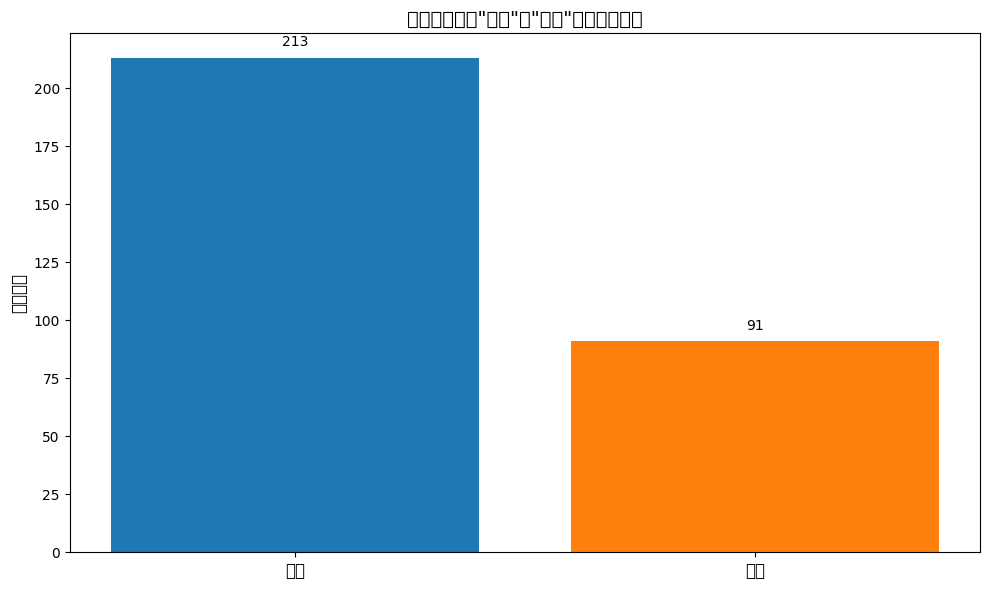

In [ ]:
# 连接Google云端硬盘
from google.colab import drive
drive.mount('/content/drive')

# 导入必要的库
import re
import matplotlib.pyplot as plt
import numpy as np

# 设置中文字体，确保图表中文正常显示
plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC"]

def count_and_visualize(file_path, keywords=['如來', '佛祖']):
    """
    统计指定关键词的出现次数并生成柱状图

    参数:
        file_path: 文件在Google云端硬盘中的路径
        keywords: 要统计的关键词列表，默认是['如來', '佛祖']
    """
    try:
        # 读取文件内容
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()

        # 初始化计数字典
        counts = {keyword: 0 for keyword in keywords}
        # 存储每个次出现的上下文（可选展示）
        contexts = {keyword: [] for keyword in keywords}

        # 遍历每个关键词进行统计
        for keyword in keywords:
            pattern = re.compile(re.escape(keyword))  # 转义特殊字符
            matches = pattern.finditer(content)

            for match in matches:
                counts[keyword] += 1
                # 记录上下文（前后各30字符）
                start = match.start()
                end = match.end()
                context_start = max(0, start - 15)
                context_end = min(len(content), end + 15)
                contexts[keyword].append(content[context_start:context_end])

        # 打印统计结果
        print("关键词出现次数统计：")
        for keyword, count in counts.items():
            print(f"'{keyword}' 共出现 {count} 次")
            # 可选：打印前3次出现的上下文（避免输出过多）
            if counts[keyword] > 0:
                print(f"前3次出现的上下文示例：")
                for i, ctx in enumerate(contexts[keyword][:10]):
                    print(f"  第{i+1}次：...{ctx}...")
            print("-" * 60)

        # 生成柱状图
        plt.figure(figsize=(10, 6))
        x = np.arange(len(keywords))
        plt.bar(x, counts.values(), color=['#1f77b4', '#ff7f0e'])
        plt.xticks(x, keywords, fontsize=12)
        plt.ylabel('出现次数', fontsize=12)
        plt.title('《西游记》中"如來"与"佛祖"出现次数对比', fontsize=14)

        # 在柱形上标注具体数字
        for i, v in enumerate(counts.values()):
            plt.text(i, v + 5, str(v), ha='center', fontsize=10)

        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print(f"错误：找不到文件 {file_path}")
    except Exception as e:
        print(f"发生错误：{str(e)}")

# 请修改为你的文件在Google云端硬盘中的实际路径
file_path = '/content/drive/MyDrive/Colab Notebooks/西遊記.txt'

# 执行统计和可视化
count_and_visualize(file_path)

/tmp/ipython-input-3266620436.py:81: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3266620436.py:81: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3266620436.py:81: UserWarning: Glyph 20315 (\N{CJK UNIFIED IDEOGRAPH-4F5B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3266620436.py:81: UserWarning: Glyph 22914 (\N{CJK UNIFIED IDEOGRAPH-5982}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3266620436.py:81: UserWarning: Glyph 22934 (\N{CJK UNIFIED IDEOGRAPH-5996}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3266620436.py:81: UserWarning: Glyph 31934 (\N{CJK UNIFIED IDEOGRAPH-7CBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3266620436.py:81: UserWarning: Glyph 24735 (\N{CJK UNIFIED IDEOGRAPH-609F}) missi

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

'如來'出现时的前5高频共现词：
  行者: 37次
  佛如: 22次
  妖精: 14次
  悟空: 13次
  不知: 11次


/tmp/ipython-input-3266620436.py:81: UserWarning: Glyph 20849 (\N{CJK UNIFIED IDEOGRAPH-5171}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3266620436.py:81: UserWarning: Glyph 29616 (\N{CJK UNIFIED IDEOGRAPH-73B0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3266620436.py:81: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3266620436.py:81: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3266620436.py:81: UserWarning: Glyph 20358 (\N{CJK UNIFIED IDEOGRAPH-4F86}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3266620436.py:81: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3266620436.py:81: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missi

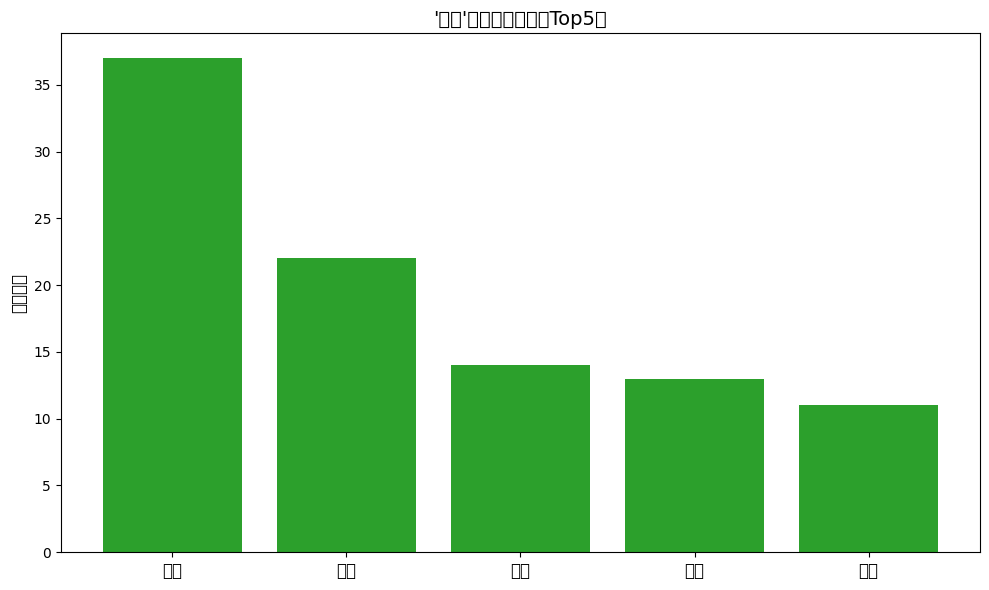

/tmp/ipython-input-3266620436.py:81: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3266620436.py:81: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3266620436.py:81: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3266620436.py:81: UserWarning: Glyph 34255 (\N{CJK UNIFIED IDEOGRAPH-85CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3266620436.py:81: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3266620436.py:81: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3266620436.py:81: UserWarning: Glyph 33769 (\N{CJK UNIFIED IDEOGRAPH-83E9}) missi


'佛祖'出现时的前5高频共现词：
  行者: 11次
  三藏: 9次
  西天: 8次
  菩薩: 8次
  東土: 7次


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20849 (\N{CJK UNIFIED IDEOGRAPH-5171}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29616 (\N{CJK UNIFIED IDEOGRAPH-73B0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20315 (\N{CJK UNIFIED IDEOGRAPH-4F5B}) missing from font(s) DejaVu Sans.
  fig.canvas

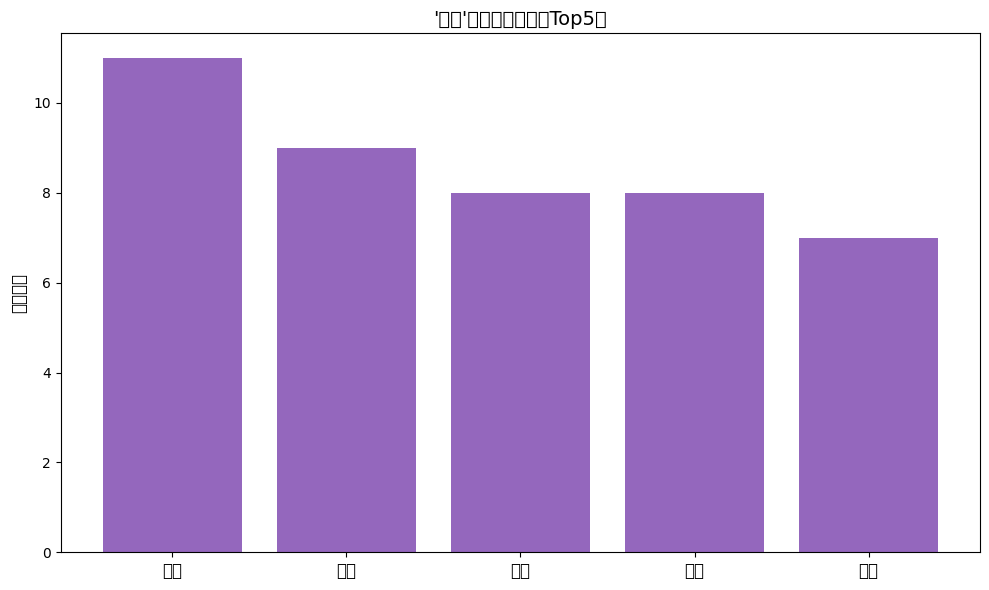

In [ ]:
# 连接Google云端硬盘
from google.colab import drive
drive.mount('/content/drive')

# 导入必要的库
import re
import jieba
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# 设置中文字体，确保中文正常显示
plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC"]

def get_buddha_cooccurrence(file_path, target_words=['如來', '佛祖'], window=20, top_n=5):
    """
    提取"如來"和"佛祖"出现时的高频共现词

    参数:
        file_path: 文件路径
        target_words: 目标关键词（默认'如來'和'佛祖'）
        window: 上下文窗口大小（前后各window个字符）
        top_n: 显示前n个高频词
    """
    try:
        # 读取文件内容
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()

        # 停用词列表（过滤无意义词汇，排除目标词本身）
        stopwords = {'的', '了', '在', '是', '有', '就', '也', '着', '之', '于',
                     '便', '乃', '与', '对', '向', '即', '等', '为', '所', '更',
                     '如來', '佛祖', '佛', '世尊', '如来佛祖'}  # 排除相关称谓

        # 存储每个目标词的共现词
        cooccurrence = {word: [] for word in target_words}

        for word in target_words:
            # 匹配目标词
            pattern = re.compile(re.escape(word))
            matches = pattern.finditer(content)

            for match in matches:
                start, end = match.span()
                # 提取上下文（前后各window个字符）
                context_start = max(0, start - window)
                context_end = min(len(content), end + window)
                context = content[context_start:context_end]

                # 分词并过滤停用词
                words = jieba.lcut(context)  # 中文分词
                # 保留长度>1的有效词汇，排除停用词
                filtered = [w for w in words if w.strip() and w not in stopwords and len(w) > 1]
                cooccurrence[word].extend(filtered)

        # 统计高频词并可视化
        for word in target_words:
            if not cooccurrence[word]:
                print(f"未找到'{word}'的共现词")
                continue

            # 统计词频并取前N
            word_counts = Counter(cooccurrence[word])
            top_words = word_counts.most_common(top_n)
            top_words, counts = zip(*top_words) if top_words else ([], [])

            # 打印结果
            print(f"\n'{word}'出现时的前{top_n}高频共现词：")
            for w, c in zip(top_words, counts):
                print(f"  {w}: {c}次")

            # 生成柱状图
            plt.figure(figsize=(10, 6))
            x = np.arange(len(top_words))
            # 不同关键词用不同颜色区分
            color = '#2ca02c' if word == '如來' else '#9467bd'
            plt.bar(x, counts, color=color)
            plt.xticks(x, top_words, fontsize=12)
            plt.ylabel('共现次数', fontsize=12)
            plt.title(f"'{word}'的高频共现词（Top{top_n}）", fontsize=14)
            plt.tight_layout()
            plt.show()

    except FileNotFoundError:
        print(f"错误：找不到文件 {file_path}")
    except Exception as e:
        print(f"发生错误：{str(e)}")

# 文件路径（请确认与你的《西游记》文本路径一致）
file_path = '/content/drive/MyDrive/Colab Notebooks/西遊記.txt'

# 执行分析（提取"如來"和"佛祖"的前5高频共现词）
get_buddha_cooccurrence(file_path)

/tmp/ipython-input-34756777.py:77: UserWarning: Glyph 29577 (\N{CJK UNIFIED IDEOGRAPH-7389}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-34756777.py:77: UserWarning: Glyph 30343 (\N{CJK UNIFIED IDEOGRAPH-7687}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-34756777.py:77: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-34756777.py:77: UserWarning: Glyph 24093 (\N{CJK UNIFIED IDEOGRAPH-5E1D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-34756777.py:77: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-34756777.py:77: UserWarning: Glyph 29616 (\N{CJK UNIFIED IDEOGRAPH-73B0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-34756777.py:77: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
关键词出现次数统计：
'玉皇大帝' 共出现 6 次
  前3次上下文示例：
    第1次：...？老孫自小兒做好漢，不曉得拜人，就是見了玉皇大帝、太上老君，我也只是唱個喏便罷了。」三藏...
    第2次：...棒一條。花果山前為帥首，水簾洞裡聚群妖。玉皇大帝傳宣詔，封我齊天極品高。幾番大鬧靈霄殿，...
    第3次：...投心臟。三千功滿拜天顏，志心朝禮明華向。玉皇大帝便加陞，親口封為捲簾將。南天門裡我為尊，...
    第4次：...既是如此，我老孫也不消上那靈霄寶殿。打攪玉皇大帝，深為不便。你自回旨去罷，我只在此等你回...
    第5次：...萬天兵，無一個對手，只鬧得太上老君害怕，玉皇大帝心驚。我二師兄乃天蓬元帥果正，他也曾掌管...
    第6次：...萬會諧。曾聚眾妖稱帥首，能降眾怪拜丹崖。玉皇大帝傳宣旨，太白金星捧詔來。請我上天承職裔，...
----------------------------------------------------------------------
'玉皇' 共出现 30 次
  前3次上下文示例：
    第1次：...兩道金光，射沖斗府。驚動高天上聖大慈仁者玉皇大天尊玄穹高上帝，駕座金闕雲宮靈霄寶殿，...
    第2次：...聚樂不題。

卻表啟那個高天上聖大慈仁者玉皇大天尊玄穹高上帝，一日駕坐金闕雲宮靈霄寶...
    第3次：...明殿外有東海龍王敖廣進表，聽天尊宣詔。」玉皇傳旨：「著宣來。」敖廣宣至靈霄殿下，禮拜...
    第4次：...靈霄殿下，禮拜畢，傍有引奏仙童接上表文。玉皇從頭看過。表曰：

「水元下界東勝神洲東...
    第5次：...王菩薩表文進上。」傍有傳言玉女接上表文。玉皇亦從頭看過。表曰：

「幽冥境界，乃地之...
    第6次：...降此妖，整理陰陽，永安地府。謹奏。」

玉皇覽畢，傳旨：「著冥君回歸地府，朕即遣將擒...
    第7次：...，恐無人去報信。且留你性命，快早回天，對玉皇說：他甚不用賢

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29616 (\N{CJK UNIFIED IDEOGRAPH-73B0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12298 (\N{LEFT DOUBLE ANGLE BRACKET}) missing from font(s) DejaVu Sans.
  fig.canvas.

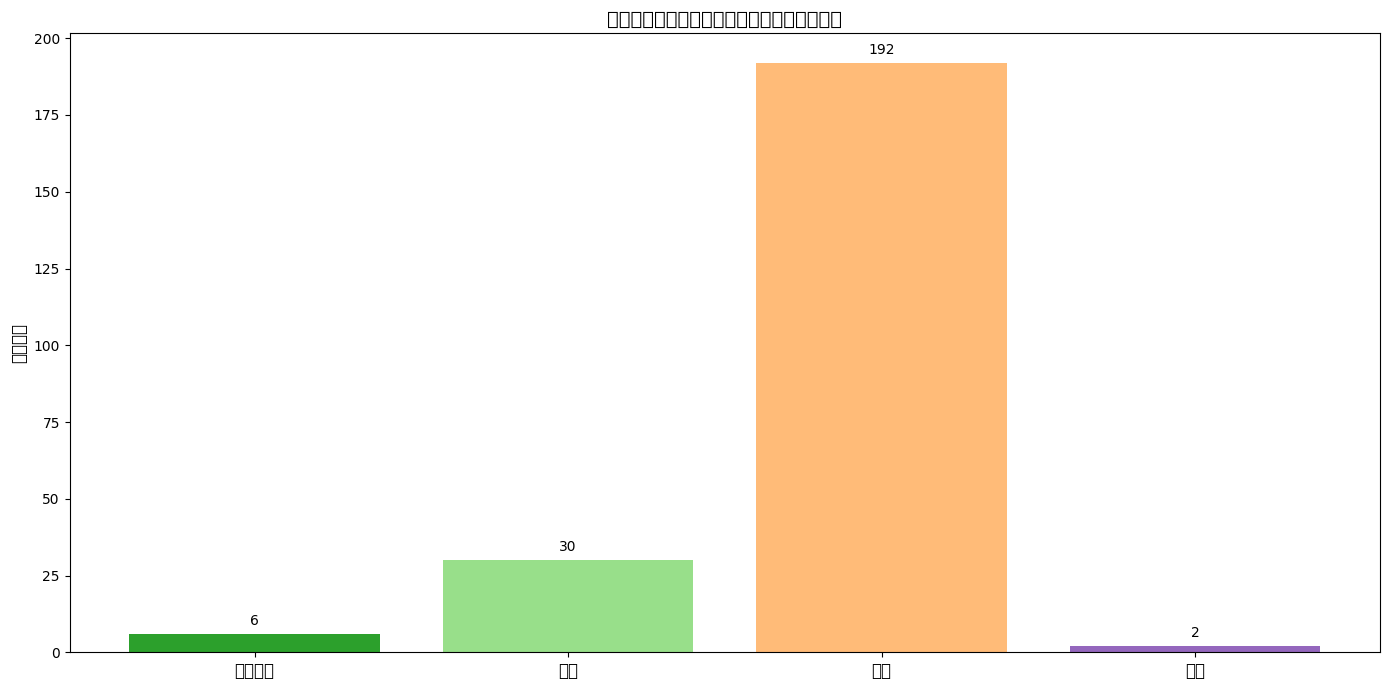

In [ ]:
# 连接Google云端硬盘
from google.colab import drive
drive.mount('/content/drive')

# 导入必要的库
import re
import matplotlib.pyplot as plt
import numpy as np

# 设置中文字体，确保图表中文正常显示
plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC"]

def count_emperor_terms(file_path, keywords=['玉皇大帝', '玉皇', '玉帝', '大帝']):
    """
    统计玉皇大帝相关称呼（含"玉皇"）的出现次数并生成可视化图表

    参数:
        file_path: 文件路径
        keywords: 要统计的关键词列表（按包含关系排序）
    """
    try:
        # 读取文件内容
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()

        # 初始化计数字典和上下文存储
        counts = {kw: 0 for kw in keywords}
        contexts = {kw: [] for kw in keywords}
        # 记录已匹配的位置，避免重复计数
        matched_positions = set()

        # 按关键词长度排序（从长到短），优先匹配长关键词
        sorted_keywords = sorted(keywords, key=lambda x: len(x), reverse=True)

        for kw in sorted_keywords:
            pattern = re.compile(re.escape(kw))
            matches = pattern.finditer(content)

            for match in matches:
                start, end = match.span()
                # 检查当前位置是否已被更长的关键词占用
                if not any(start < pos_end and end > pos_start for pos_start, pos_end in matched_positions):
                    counts[kw] += 1
                    matched_positions.add((start, end))
                    # 记录上下文（前后各30字符）
                    context_start = max(0, start - 20)
                    context_end = min(len(content), end + 20)
                    contexts[kw].append(content[context_start:context_end])

        # 打印统计结果
        print("关键词出现次数统计：")
        for kw in keywords:  # 按原顺序输出
            print(f"'{kw}' 共出现 {counts[kw]} 次")
            # 显示前3次上下文示例
            if counts[kw] > 0:
                print("  前3次上下文示例：")
                for i, ctx in enumerate(contexts[kw][:10]):
                    print(f"    第{i+1}次：...{ctx}...")
            print("-" * 70)

        # 生成柱状图
        plt.figure(figsize=(14, 7))
        x = np.arange(len(keywords))
        bars = plt.bar(x, counts.values(), color=['#2ca02c', '#98df8a', '#ffbb78', '#9467bd'])

        # 设置坐标轴和标题
        plt.xticks(x, keywords, fontsize=12)
        plt.ylabel('出现次数', fontsize=12)
        plt.title('《西游记》中玉皇大帝相关称呼出现次数对比', fontsize=14)

        # 在柱形上标注具体数值
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 2,
                    f'{height}', ha='center', va='bottom', fontsize=10)

        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print(f"错误：找不到文件 {file_path}")
    except Exception as e:
        print(f"发生错误：{str(e)}")

# 文件路径（请确认与你的《西游记》文本路径一致）
file_path = '/content/drive/MyDrive/Colab Notebooks/西遊記.txt'

# 执行统计与可视化
count_emperor_terms(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.12/dist-packages/jieba/__init__.py:44: SyntaxWarning: invalid escape sequence '\.'
  re_han_default = re.compile("([\u4E00-\u9FD5a-zA-Z0-9+#&\._%\-]+)", re.U)
/usr/local/lib/python3.12/dist-packages/jieba/__init__.py:46: SyntaxWarning: invalid escape sequence '\s'
  re_skip_default = re.compile("(\r\n|\s)", re.U)
/usr/local/lib/python3.12/dist-packages/jieba/finalseg/__init__.py:78: SyntaxWarning: invalid escape sequence '\.'
  re_skip = re.compile("([a-zA-Z0-9]+(?:\.\d+)?%?)")
Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.327 seconds.
DEBUG:jieba:Loading model cost 1.327 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.
/tmp/ipython-input-2214425647.py:78: UserWarning: Glyph 38728 (\N{CJK UNIFIED IDEOGRAPH-9748}) missi


'玉皇'出现时的前5高频共现词：
  靈霄: 7次
  老孫: 5次
  上帝: 4次
  天上: 3次
  變化: 3次


/tmp/ipython-input-2214425647.py:78: UserWarning: Glyph 29577 (\N{CJK UNIFIED IDEOGRAPH-7389}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2214425647.py:78: UserWarning: Glyph 30343 (\N{CJK UNIFIED IDEOGRAPH-7687}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2214425647.py:78: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2214425647.py:78: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2214425647.py:78: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2214425647.py:78: UserWarning: Glyph 20849 (\N{CJK UNIFIED IDEOGRAPH-5171}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2214425647.py:78: UserWarning: Glyph 35789 (\N{CJK UNIFIED IDEOGRAPH-8BCD}) missi

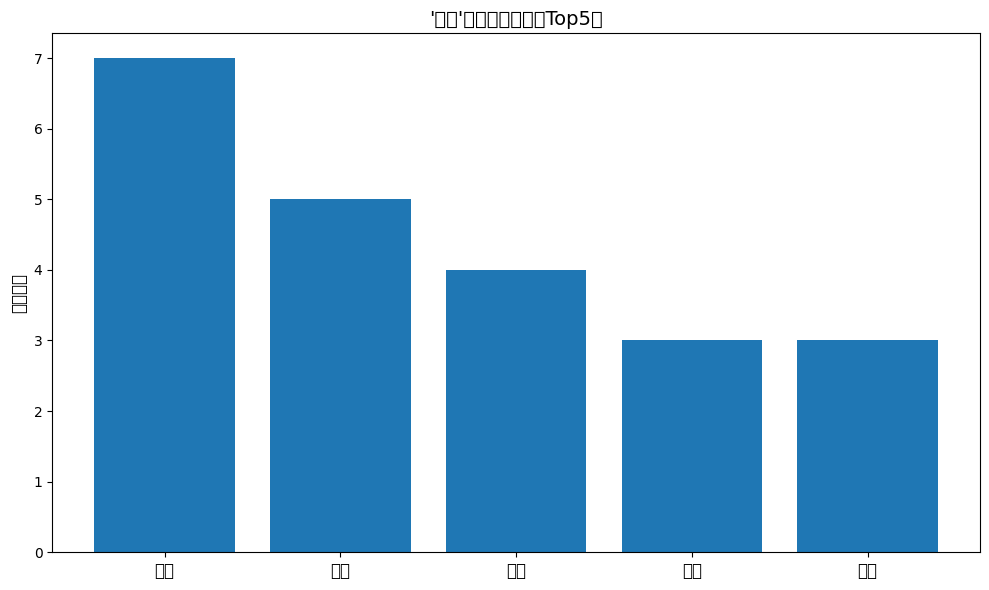

/tmp/ipython-input-2214425647.py:78: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2214425647.py:78: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2214425647.py:78: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2214425647.py:78: UserWarning: Glyph 30028 (\N{CJK UNIFIED IDEOGRAPH-754C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2214425647.py:78: UserWarning: Glyph 26088 (\N{CJK UNIFIED IDEOGRAPH-65E8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2214425647.py:78: UserWarning: Glyph 24847 (\N{CJK UNIFIED IDEOGRAPH-610F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2214425647.py:78: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missi


'玉帝'出现时的前5高频共现词：
  行者: 31次
  下界: 21次
  旨意: 15次
  天王: 15次
  傳旨: 14次


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29616 (\N{CJK UNIFIED IDEOGRAPH-73B0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29577 (\N{CJK UNIFIED IDEOGRAPH-7389}) missing from font(s) DejaVu Sans.
  fig.canvas

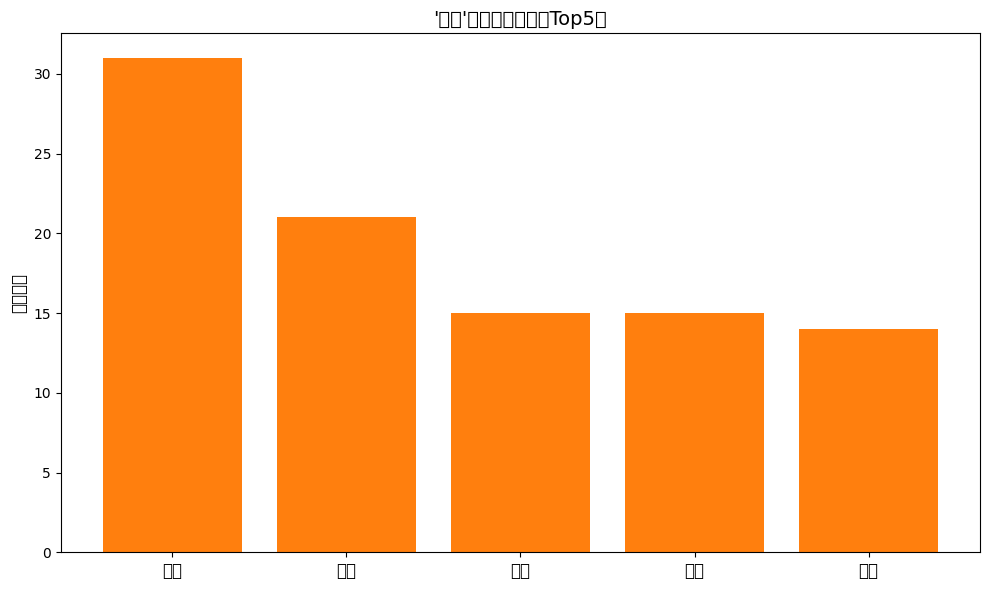

In [ ]:
# 连接Google云端硬盘
from google.colab import drive
drive.mount('/content/drive')

# 导入必要的库
import re
import jieba
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# 设置中文字体
plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC"]

def get_top_cooccurrence(file_path, target_words=['玉皇', '玉帝'], window=20, top_n=5):
    """
    提取目标词出现时的高频共现词

    参数:
        file_path: 文件路径
        target_words: 目标关键词（'玉皇'和'玉帝'）
        window: 上下文窗口大小（前后各window个字符）
        top_n: 显示前n个高频词
    """
    try:
        # 读取文件内容
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()

        # 停用词列表（过滤无意义词汇）
        stopwords = {'的', '了', '在', '是', '有', '就', '也', '着', '之', '于',
                     '便', '乃', '与', '对', '向', '即', '等', '为', '所', '更',
                     '玉皇', '玉帝', '玉皇大帝', '大帝'}  # 排除目标词本身

        # 存储每个目标词的共现词
        cooccurrence = {word: [] for word in target_words}

        for word in target_words:
            # 匹配目标词
            pattern = re.compile(re.escape(word))
            matches = pattern.finditer(content)

            for match in matches:
                start, end = match.span()
                # 提取上下文（前后各window个字符）
                context_start = max(0, start - window)
                context_end = min(len(content), end + window)
                context = content[context_start:context_end]

                # 分词并过滤停用词
                words = jieba.lcut(context)
                filtered = [w for w in words if w.strip() and w not in stopwords and len(w) > 1]
                cooccurrence[word].extend(filtered)

        # 统计高频词并可视化
        for word in target_words:
            if not cooccurrence[word]:
                print(f"未找到'{word}'的共现词")
                continue

            # 统计词频
            word_counts = Counter(cooccurrence[word])
            top_words = word_counts.most_common(top_n)
            top_words, counts = zip(*top_words) if top_words else ([], [])

            # 打印结果
            print(f"\n'{word}'出现时的前{top_n}高频共现词：")
            for w, c in zip(top_words, counts):
                print(f"  {w}: {c}次")

            # 生成柱状图
            plt.figure(figsize=(10, 6))
            x = np.arange(len(top_words))
            plt.bar(x, counts, color=['#1f77b4' if word == '玉皇' else '#ff7f0e'])
            plt.xticks(x, top_words, fontsize=12)
            plt.ylabel('出现次数', fontsize=12)
            plt.title(f"'{word}'的高频共现词（Top{top_n}）", fontsize=14)
            plt.tight_layout()
            plt.show()

    except FileNotFoundError:
        print(f"错误：找不到文件 {file_path}")
    except Exception as e:
        print(f"发生错误：{str(e)}")

# 文件路径（请确认与你的《西游记》文本路径一致）
file_path = '/content/drive/MyDrive/Colab Notebooks/西遊記.txt'

# 执行分析（提取"玉皇"和"玉帝"的前5高频共现词）
get_top_cooccurrence(file_path)

In [ ]:
import requests
import pandas as pd
import sqlite3

# 1️⃣ 定义 API URL
url = "https://cbdb.fas.harvard.edu/cbdbapi/person.php?name=王安石&o=json"

# 2️⃣ 发起请求
headers = {"User-Agent": "Mozilla/5.0"}  # 防止403拒绝
response = requests.get(url, headers=headers, timeout=10)

# 3️⃣ 检查返回状态
print("Status code:", response.status_code)

# 4️⃣ 尝试解析 JSON
try:
    data = response.json()
    print("✅ 成功解析 JSON 数据！")
except Exception as e:
    print("❌ JSON 解析失败：", e)
    print("返回内容预览：", response.text[:500])

# 5️⃣ 查看返回的数据结构
print("返回的顶层键：", list(data.keys()))

# 6️⃣ 提取人物信息
if "person" in data and isinstance(data["person"], list):
    df = pd.DataFrame(data["person"])
    print(f"✅ 成功载入 {len(df)} 条人物数据")
    display(df.head())

    # 新增：保存为CSV文件
    csv_filename = "王安石相关人物数据.csv"
    df.to_csv("/home/user/data/王安石相关人物数据.csv", index=False, encoding="utf-8-sig")  # Linux/Mac路径
    print(f"📄 已保存为CSV文件：{csv_filename}")

    # 7️⃣ （可选）保存到 SQLite 数据库
    conn = sqlite3.connect("cbdb_local.db")
    df.to_sql("cbdb_wang_anshi", conn, if_exists="replace", index=False)
    conn.close()
    print("💾 已保存到本地 SQLite 数据库 cbdb_local.db 中的表 cbdb_wang_anshi。")
else:
    print("⚠️ 没有找到 'person' 字段或数据为空")
    print(data)


Status code: 200
✅ 成功解析 JSON 数据！
返回的顶层键： ['Package']
⚠️ 没有找到 'person' 字段或数据为空
{'Package': {'PersonAuthority': {'DataSource': 'CBDB', 'Version': '20131220', 'PersonInfo': {'Person': {'BasicInfo': {'PersonId': '1762', 'EngName': 'Wang Anshi', 'ChName': '王安石', 'IndexYear': '1021', 'IndexAddrId': '100513', 'IndexAddr': '臨川', 'Gender': '0', 'YearBirth': '1021', 'DynastyBirth': '北宋', 'DynastyBirthId': '15', 'EraBirth': '天禧', 'EraBirthId': '516', 'EraYearBirth': '5', 'YearDeath': '1086', 'DynastyDeath': '北宋', 'DynastyDeathId': '15', 'EraDeath': '元祐', 'EraDeathId': '530', 'EraYearDeath': '1', 'YearsLived': '66', 'Dynasty': '宋', 'DynastyId': '15', 'JunWang': '太原', 'JunWangId': '20', 'Notes': "Wang(2) Anshi [1762] Yi(3)'s [7082] son, Guan(1)'s [1841] grandnephew, Anguo's [7076], Anli's [1760], and Anshang's [1761] brother, Fang's [1803] uncle, Jue(1)'s [1796] great grandfather, Zhu(1) Mingzhi's [526] and Shen(2) Jichang's [1445] brother-in-law, Cai(1) Bian's [8131] father-in-law and uncle-in-law

In [ ]:
create

Colab now has AI features powered by <a href="https://gemini.google.com">Gemini</a>. The video below provides information on how to use these features, whether you're new to Python or a seasoned veteran.

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  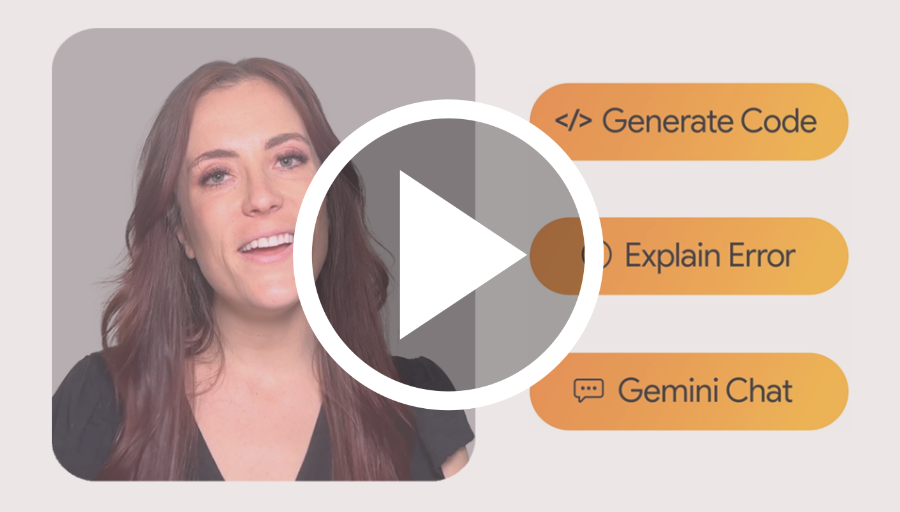
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or ‘Colaboratory’, allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a <strong>student</strong>, a <strong>data scientist</strong> or an <strong>AI researcher</strong>, Colab can make your work easier. Watch <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introduction to Colab</a> or <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y">Colab features you may have missed</a> to learn more or just get started below!

<div class="markdown-google-sans">

## <strong>Getting started</strong>
</div>

The document that you are reading is not a static web page, but an interactive environment called a <strong>Colab notebook</strong> that lets you write and execute code.

For example, here is a <strong>code cell</strong> with a short Python script that computes a value, stores it in a variable and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut 'Command/Ctrl+Enter'. To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine <strong>executable code</strong> and <strong>rich text</strong> in a single document, along with <strong>images</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To find out more, see <a href="/notebooks/basic_features_overview.ipynb">Overview of Colab</a>. To create a new Colab notebook you can use the File menu above, or use the following link: <a href="http://colab.research.google.com#create=true">Create a new Colab notebook</a>.

Colab notebooks are Jupyter notebooks that are hosted by Colab. To find out more about the Jupyter project, see <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyse and visualise data. The code cell below uses <strong>numpy</strong> to generate some random data, and uses <strong>matplotlib</strong> to visualise it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from GitHub and many other sources. To find out more about importing data, and how Colab can be used for data science, see the links below under <a href="#working-with-data">Working with data</a>.

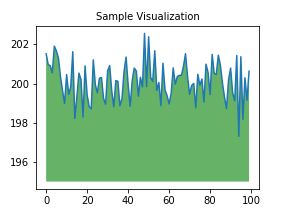

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning that you can leverage the power of Google hardware, including <a href="#using-accelerated-hardware">GPUs and TPUs</a>, regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for <strong>pandas</strong> code to finish running and want to go faster, you can switch to a GPU runtime and use libraries like <a href="https://rapids.ai/cudf-pandas">RAPIDS cuDF</a> that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb">10-minute guide</a> or
 <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb">US stock market data analysis demo</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it and evaluate the model, all in just <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">a few lines of code</a>.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the <a href="#machine-learning-examples">machine learning examples</a> below.

<div class="markdown-google-sans">

## More resources

### Working with notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with data
</div>

- [Loading data: Drive, Sheets and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualising data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine learning

<div>

These are a few of the notebooks related to machine learning, including Google's online machine learning course. See the <a href="https://developers.google.com/machine-learning/crash-course/">full course website</a> for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Getting started with cuML's accelerator mode](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cuml_sklearn_colab_demo.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using accelerated hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Retraining an Image Classifier</a>: Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Text Classification</a>: Classify IMDB film reviews as either <em>positive</em> or <em>negative</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Style Transfer</a>: Use deep learning to transfer style between images.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: Use a machine-learning model to answer questions from the SQuAD dataset.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video Interpolation</a>: Predict what happened in a video between the first and the last frame.
